# **Introduction to Machine Learning in Python**

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Part 0. Supervised Machine Learning — An Overview**

*Please note that all tasks in Part 0 are designed to familiarize you with the basic structure of machine learning workflow in Python and will not be counted toward your final grade for the homework.*

In [2]:
# import packages
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder

#### Machine Learning Model

Machine learning models are algorithms that can identify patterns or make predictions on unseen datasets.

#### Loss Function

The loss function, also referred to as the error function, quantifies the difference between the predicted outputs of a machine learning algorithm and the actual target values. The resulting value, the loss, reflects the accuracy of the model's predictions.

#### Supervised Learning
The majority of practical machine learning uses supervised learning. In supervised learning, you have input variables (X) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

${Y} = {f(X)}$

The goal is to approximate the mapping function so well that when you have new input data (X) that you can predict the output variables (Y) for that data. It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher.

Supervised learning problems can be  grouped into regression and classification problems:
- ***Classification:*** A classification problem is when the output variable is a category (e.g., red or blue or disease and no disease)
- ***Regression:*** A regression problem is when the output variable is a continuous value (e.g., dollars or weight)

![machine learning.png](./machine_learning.png)

### Task 1. Loading and Analyzing Data

Fill in the blanks in the code to load and analyze the data.

In [4]:
# load the dataset
df = pd.read_csv('office.csv')

In [ ]:
# display the first 5 rows from the dataset
df.head()

,address_AO,address_district,general_info_Class,building_type,layout,building_state,closest_metro,area,dist_to_closest_metro,dist_to_center,ceiling_height,parking_free,parking_nonfree,parking_covered,floor_count,floor_cur,building_year,price_per_meter_cleared
0,12.0,124.0,6.0,5.0,4.0,3.0,248.0,68.5,168.115135,5093.360171,3.0,0,0,0,97.0,5.0,2017.0,479300.0
1,6.0,74.0,6.0,5.0,4.0,5.0,175.0,19.1,1371.220394,6755.118509,4.0,0,0,1,18.0,9.0,2021.0,225000.0
2,6.0,74.0,6.0,5.0,4.0,5.0,175.0,19.1,1371.220394,6755.118509,4.0,0,0,1,18.0,9.0,2021.0,225000.0
3,7.0,79.0,6.0,5.0,4.0,3.0,115.0,24.6,962.157414,12119.624846,3.7,0,0,0,10.0,10.0,2009.0,150000.0
4,7.0,79.0,6.0,5.0,4.0,3.0,115.0,24.6,962.157414,12119.624846,3.7,0,0,0,10.0,10.0,2009.0,150000.0


In [5]:
# look at the size of the dataset
df.shape

(4020, 18)

In [6]:
# check null values
df.isna().sum()

,0
address_AO,0
address_district,0
general_info_Class,0
building_type,0
layout,0
building_state,0
closest_metro,0
area,0
dist_to_closest_metro,0
dist_to_center,0


In [7]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_AO               4020 non-null   float64
 1   address_district         4020 non-null   float64
 2   general_info_Class       4020 non-null   float64
 3   building_type            4020 non-null   float64
 4   layout                   4020 non-null   float64
 5   building_state           4020 non-null   float64
 6   closest_metro            4020 non-null   float64
 7   area                     4020 non-null   float64
 8   dist_to_closest_metro    4020 non-null   float64
 9   dist_to_center           4020 non-null   float64
 10  ceiling_height           4020 non-null   float64
 11  parking_free             4020 non-null   int64  
 12  parking_nonfree          4020 non-null   int64  
 13  parking_covered          4020 non-null   int64  
 14  floor_count             

### Task 2. Visualizing Data

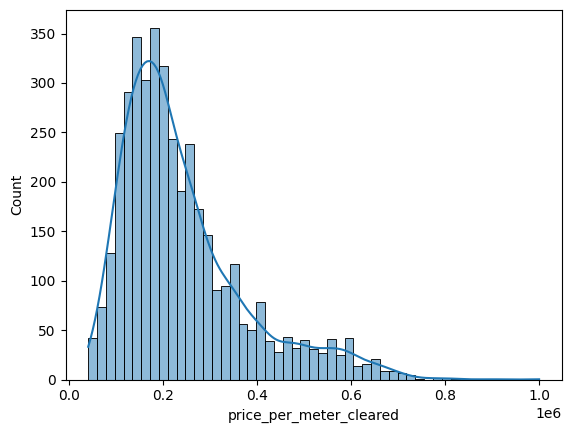

In [8]:
# visualise the distribution of the target variable on a histogram
sns.histplot(df, x='price_per_meter_cleared', kde=True)
plt.show()

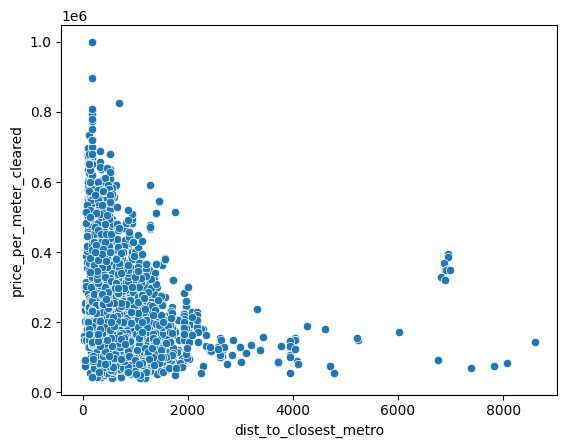

In [9]:
# visualise the relation between target variable and any of the features on a scatterplot
sns.scatterplot(x='dist_to_closest_metro', y='price_per_meter_cleared', data=df)
plt.show()

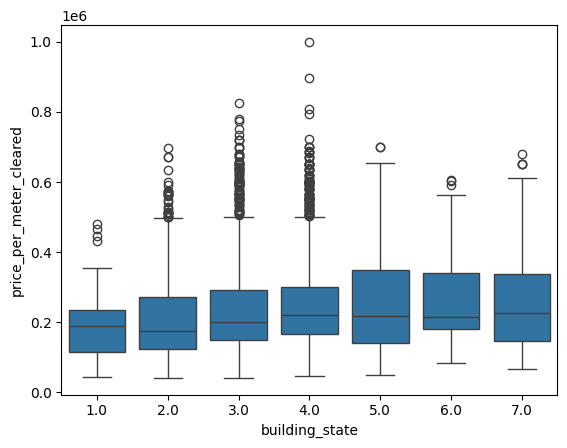

In [10]:
# visualise the relation between target variable and any of the features on a box and whisker plot
sns.boxplot(x='building_state', y='price_per_meter_cleared', data=df)
plt.show()

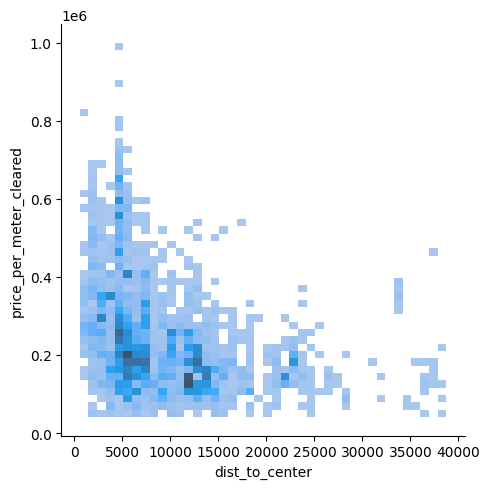

In [11]:
# visualise the relation between target variable and any of the features
sns.displot(x='dist_to_center', y='price_per_meter_cleared', data=df)
plt.show()

### Task 3. Preparing Dataset for Machine Learning

Fill in the blanks in the code to create two datasets containg features and target variable.

Hint: Drop the column with the target variable(y) from the features(X) dataset

In [12]:
# features
X = df.drop(columns=['price_per_meter_cleared'], axis=1)

In [13]:
# target variable
y = df['price_per_meter_cleared']

Fill in the blanks in the code to split the data into training and testing datasets.

In [14]:
#split data into training and testing sets with train_test_split() method
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                         train_size=0.8,
                                         random_state=42)

In [15]:
#check the size of the training dataset (80% of the dataset)
X_train.shape

(3216, 17)

In [16]:
#check the size of the testing dataset (20% of the dataset)
X_test.shape

(804, 17)

### Task 4. Training the Model

Fill in the blanks in the code to create and train the linear regression model.

In [17]:
#create a linear regression model
ml_model = LinearRegression()

In [18]:
#train the model using fit() method
ml_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# coefficients
ml_model.coef_[:10]

array([ 2.03568943e+03,  3.05230832e+02,  1.12793777e+04,  5.22412329e+03,
        1.90330894e+03,  2.78802626e+03,  8.76584771e+02, -1.06848127e+01,
       -1.64671439e+01,  6.35882687e-01])

In [20]:
# intercept
ml_model.intercept_

np.float64(-9987.128483121924)

Fill in the blanks in the code to get predictions on the training dataset.

In [21]:
# make predictions using predict() method
y_pred_train = ml_model.predict(X_train)

In [22]:
# display the predicted output variables
y_pred_train

array([260259.99000607, 221619.55795744, 225495.94052698, ...,
       152499.19025736, 250036.4513362 , 186822.3091546 ])

### Task 5. Evaluating the Model

#### Quality Metrics for a Regression Model

An error metric is a way to quantify the performance of a model and provides a way for the forecaster to ompare different models. Although evaluation metrics differ in their interpretation and utility across various scenarios, **lower values or values closer to zero generally indicate a better prediction quality of the model.**

#### **Mean Squared Error (MSE)**

![MSE.png](./MSE.png)

#### **Mean Absolute Error(MAE)**

![MAE.png](./MAE.png)

#### **Mean Absolute Percentage Error(MAPE)**

![MAPE.png](./MAPE.png)

Fill in the blanks in the code to calculate MSE, MAE and MAPE.

In [23]:
#calculate and interpret MSE
mean_squared_error(y_train, y_pred_train)

6590280832.783537

In [24]:
#calculate and interpret MAE
mean_absolute_error(y_train, y_pred_train)

59990.95066646496

In [25]:
#calculate and interpret MAPE
mean_absolute_percentage_error(y_train, y_pred_train)

0.31196310893125173

### Task 6. Testing the Model

Fill in the blanks in the code to get predictions on the testing sample

In [30]:
# make predictions using predict() method
y_pred_test = ml_model.predict(X_test)

In [31]:
#calculate and interpret MSE
mean_squared_error(y_test, y_pred_test)

6136462557.068902

In [32]:
#calculate and interpret MAE
mean_absolute_error(y_test, y_pred_test)

58489.2230430593

In [29]:
#calculate interpret MAPE
mean_absolute_percentage_error(y_test, y_pred_test)

0.3121434985272091

## **Part 1. Regression — Linear Regression Model**

### Task 1. Loading and Analyzing Data

Fill in the blanks to load and analyze the data [1 point].

In [3]:
# load the 'salaries.csv' dataset
df = pd.read_csv('salaries.csv')

In [35]:
# display the first 5 rows from the dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [36]:
# look at the size of the dataset
df.shape

(3755, 11)

In [37]:
# calculate the number of NaN values in each column
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


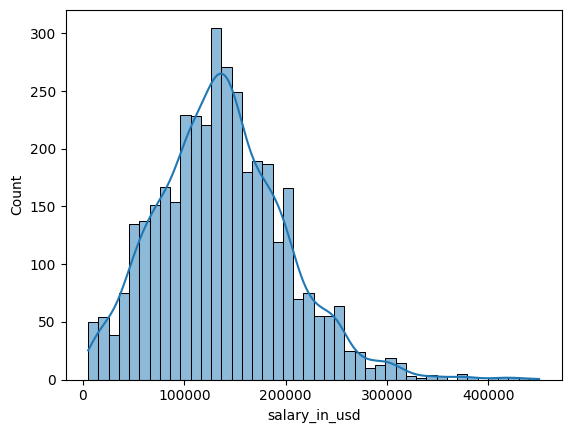

In [38]:
# visualise the distribution of the target variable (i.e. 'salary_in_usd') on a histogram
sns.histplot(df, x='salary_in_usd', kde=True)
plt.show()

In [39]:
# display minimum, average and maximum value of the target variable (i.e. 'salary_in_usd')
df['salary_in_usd'].describe()

,salary_in_usd
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


### Task 2. Selecting Features

Fill in the blanks to analyze features [1 point].

What is the average salary and salary in USD based on the experience?

- EN: Entry
- MI: Middle
- SE: Senior
- EX: Executive

experience_level
SE    170048.965421
EN    188381.178125
EX    246802.201754
MI    248200.306832
Name: salary, dtype: float64


<Axes: xlabel='experience_level'>

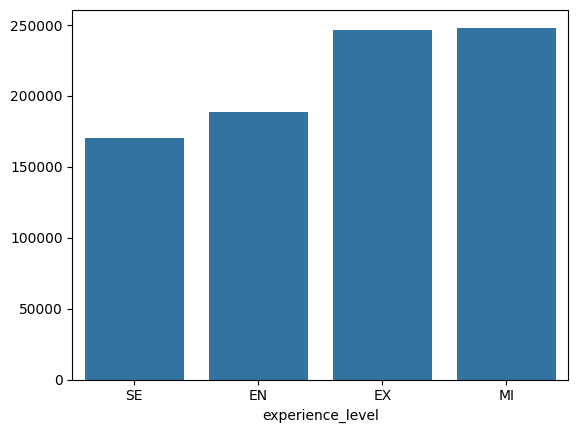

In [40]:
# group by experience and calculate mean salary
experience_salary = df.groupby('experience_level')['salary'].mean().sort_values()

# display and visualise average salary for each experience level on a bar plot
print(experience_salary)
sns.barplot(x = experience_salary.index, y = experience_salary.values)

experience_level
EN     78546.284375
MI    104525.939130
SE    153051.071542
EX    194930.929825
Name: salary_in_usd, dtype: float64


<Axes: xlabel='experience_level'>

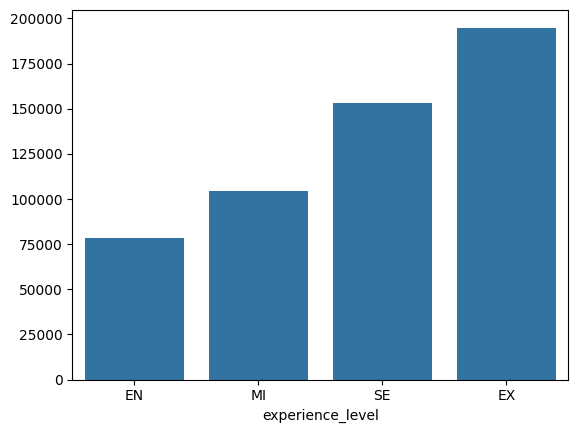

In [41]:
# group by experience and calculate mean salary in USD
experience_salary_usd = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
# display and visualise average salary in USD for each experience level on a bar plot

print(experience_salary_usd)
sns.barplot(x = experience_salary_usd.index, y = experience_salary_usd.values)

What is the median salary in USD based on the employee's country of residence?

employee_residence
MK      6304.0
MA     10000.0
SK     12608.0
ID     15000.0
MD     18000.0
        ...   
CN    125404.0
US    145000.0
PR    160000.0
MY    200000.0
IL    423834.0
Name: salary_in_usd, Length: 78, dtype: float64


<Axes: xlabel='employee_residence'>

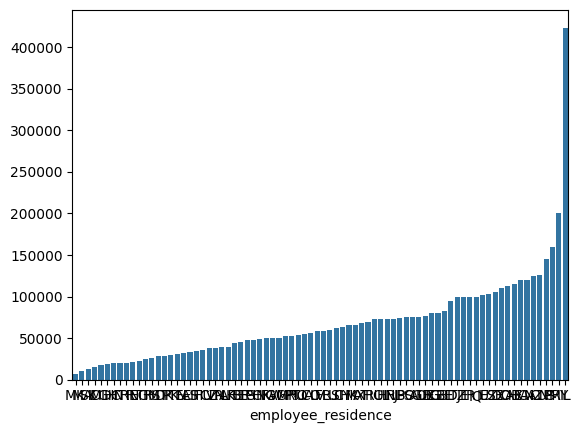

In [42]:
# group by employee residence and calculate median salary in usd
experience_salary_usd_med = df.groupby('employee_residence')['salary_in_usd'].median().sort_values()

# display median salary in USD for the top-5 residence locations
print(experience_salary_usd_med)
sns.barplot(x = experience_salary_usd_med.index, y = experience_salary_usd_med.values)

What is the average salary in USD based on the employment contract type?

- FT: Full-time
- PT: Part-time
- CT: Contract
- FL: Freelance

employment_type
PT     39533.705882
FL     51807.800000
CT    113446.900000
FT    138314.199570
Name: salary_in_usd, dtype: float64


<Axes: xlabel='employment_type'>

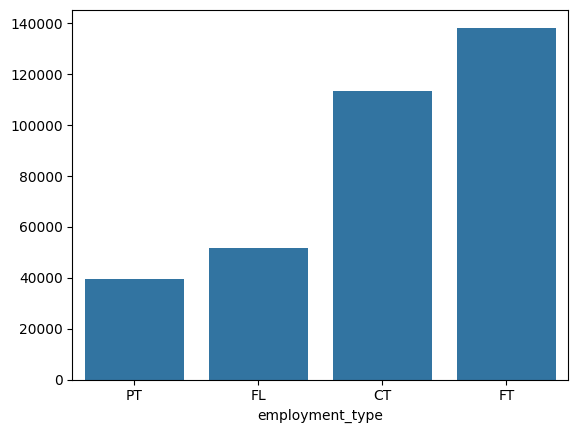

In [43]:
# group by employment type and calculate mean salary in usd
emp_type_salary_usd = df.groupby('employment_type')['salary_in_usd'].mean().sort_values()

# display and visualise average salary in USD for each employment contract type on a bar plot
print(emp_type_salary_usd)
sns.barplot(x = emp_type_salary_usd.index, y = emp_type_salary_usd.values)


What is the average salary in USD based on the company size?

- S: Small
- M: Medium
- L: Large

company_size
S     78226.682432
L    118300.982379
M    143130.548367
Name: salary_in_usd, dtype: float64


<Axes: xlabel='company_size'>

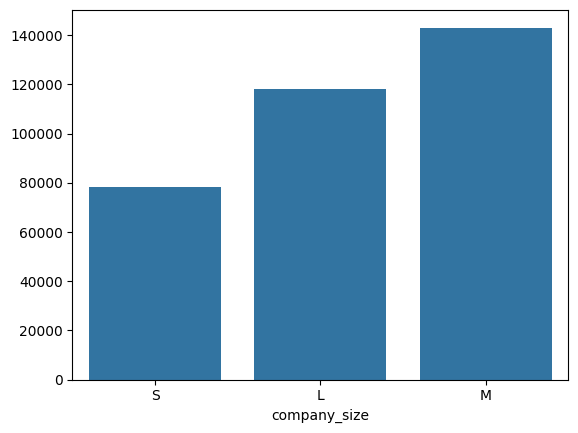

In [44]:
# group by company size and calculate mean salary in usd
comp_size_salary_usd = df.groupby('company_size')['salary_in_usd'].mean().sort_values()

# display and visualise average salary in USD for each company size category on a bar plot
print(comp_size_salary_usd)
sns.barplot(x = comp_size_salary_usd.index, y = comp_size_salary_usd.values)


In [13]:
data = pd.read_csv('salaries.csv')

data['experience_level'] = data['experience_level'].map({
    'EN': 'Entry',
    'MI': 'Middle',
    'SE': 'Senior',
    'EX': 'Executive'
})

data['employment_type'] = data['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

data['company_size'] = data['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

data['remote_ratio'] = data['remote_ratio'].map({
    100: 'remote',
    0: 'onsite',
    50: 'hybrid',
})

data = data.drop(['salary'], axis=1)
data = data.rename(columns={'salary_in_usd': 'salary'})

In [14]:
data

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,EUR,85847,ES,remote,ES,Large
1,2023,Middle,Contract,ML Engineer,USD,30000,US,remote,US,Small
2,2023,Middle,Contract,ML Engineer,USD,25500,US,remote,US,Small
3,2023,Senior,Full-time,Data Scientist,USD,175000,CA,remote,CA,Medium
4,2023,Senior,Full-time,Data Scientist,USD,120000,CA,remote,CA,Medium
...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,USD,412000,US,remote,US,Large
3751,2021,Middle,Full-time,Principal Data Scientist,USD,151000,US,remote,US,Large
3752,2020,Entry,Full-time,Data Scientist,USD,105000,US,remote,US,Small
3753,2020,Entry,Contract,Business Data Analyst,USD,100000,US,remote,US,Large


### Task 3. Encoding Features using One Hot Encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder

![one hot encoding.png](./one_hot_encoding.png)

#### Option 1. Encoding categorical features with OneHotEncoder

Fill in the blanks in the code to process categorical features [1 point].

In [16]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,EUR,85847,ES,remote,ES,Large
1,2023,Middle,Contract,ML Engineer,USD,30000,US,remote,US,Small
2,2023,Middle,Contract,ML Engineer,USD,25500,US,remote,US,Small
3,2023,Senior,Full-time,Data Scientist,USD,175000,CA,remote,CA,Medium
4,2023,Senior,Full-time,Data Scientist,USD,120000,CA,remote,CA,Medium


In [17]:
# pass ALL categorical columns from in 'salaries.csv' dataset to columns=[ ] argument
data_to_encode = pd.DataFrame(data=data, columns=['experience_level', 'employment_type', 'job_title',
      'salary_currency', 'employee_residence', 'remote_ratio',
      'company_location', 'company_size'])

print('Before One Hot Encoding:')
display(data_to_encode.head())

Before One Hot Encoding:


,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,Senior,Full-time,Principal Data Scientist,EUR,ES,remote,ES,Large
1,Middle,Contract,ML Engineer,USD,US,remote,US,Small
2,Middle,Contract,ML Engineer,USD,US,remote,US,Small
3,Senior,Full-time,Data Scientist,USD,CA,remote,CA,Medium
4,Senior,Full-time,Data Scientist,USD,CA,remote,CA,Medium


In [18]:
# encode categorical features with OneHotEncoder() method
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
one_hot_encoder.fit(data_to_encode)
results_ohe = one_hot_encoder.transform(data_to_encode)
results_ohe

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30040 stored elements and shape (3755, 277)>

In [19]:
data_encoded = pd.DataFrame.sparse.from_spmatrix(results_ohe)
data_encoded.columns = one_hot_encoder.get_feature_names_out(data_to_encode.columns)
print('\nAfter One Hot Encoding:')
display(data_encoded)


After One Hot Encoding:


,experience_level_Entry,experience_level_Executive,experience_level_Middle,experience_level_Senior,employment_type_Contract,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,job_title_3D Computer Vision Researcher,job_title_AI Developer,...,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_Large,company_size_Medium,company_size_Small
0,0,0,0,1.0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0
1,0,0,1.0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
2,0,0,1.0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
3,0,0,0,1.0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
4,0,0,0,1.0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,0,0,0,1.0,0,0,1.0,0,0,0,...,0,0,0,0,0,1.0,0,1.0,0,0
3751,0,0,1.0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,1.0,0,1.0,0,0
3752,1.0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
3753,1.0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,1.0,0,0


In [20]:
data_not_encoded = data[['work_year', 'salary']]
data_processed = pd.concat([data_not_encoded, data_encoded], axis=1)
data_processed

,work_year,salary,experience_level_Entry,experience_level_Executive,experience_level_Middle,experience_level_Senior,employment_type_Contract,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,...,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_Large,company_size_Medium,company_size_Small
0,2023,85847,0,0,0,1.0,0,0,1.0,0,...,0,0,0,0,0,0,0,1.0,0,0
1,2023,30000,0,0,1.0,0,1.0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
2,2023,25500,0,0,1.0,0,1.0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
3,2023,175000,0,0,0,1.0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,1.0,0
4,2023,120000,0,0,0,1.0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,412000,0,0,0,1.0,0,0,1.0,0,...,0,0,0,0,0,1.0,0,1.0,0,0
3751,2021,151000,0,0,1.0,0,0,0,1.0,0,...,0,0,0,0,0,1.0,0,1.0,0,0
3752,2020,105000,1.0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
3753,2020,100000,1.0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,1.0,0,1.0,0,0


#### Option 2. Encoding categorical features with get_dummies

In [21]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,EUR,85847,ES,remote,ES,Large
1,2023,Middle,Contract,ML Engineer,USD,30000,US,remote,US,Small
2,2023,Middle,Contract,ML Engineer,USD,25500,US,remote,US,Small
3,2023,Senior,Full-time,Data Scientist,USD,175000,CA,remote,CA,Medium
4,2023,Senior,Full-time,Data Scientist,USD,120000,CA,remote,CA,Medium


In [22]:
# display all columns in 'salaries.csv' dataset
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'salary', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [23]:
# pass ALL features to get_dummies() function
data_processed = pd.get_dummies(data, columns=['experience_level', 'employment_type', 'job_title',
       'salary_currency', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'], drop_first=True)
data_processed

,work_year,salary,experience_level_Executive,experience_level_Middle,experience_level_Senior,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,job_title_AI Developer,job_title_AI Programmer,...,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_Medium,company_size_Small
0,2023,85847,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023,30000,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,2023,25500,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2023,175000,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2023,120000,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,412000,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3751,2021,151000,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3752,2020,105000,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3753,2020,100000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### Task 4. Preparing Dataset for Machine Learning

Fill in the blanks to create training and testing datasets [2 points].

In [24]:
# training features
X = data_processed.drop(columns=['salary'], axis=1)

In [25]:
# target variable
y = data_processed['salary']

In [26]:
# split data into training and testing sets using 80/20 ratio and random_state set at 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                         train_size=0.8,
                                         random_state=42)


### Task 5. Training and Evaluating the Model

Fill in the blanks to create and train the linear regression model [2 points].

In [27]:
#create a linear regression model
lin_reg_model = LinearRegression()

In [28]:
#fit the model
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# make predictions
y_pred_train_lr = lin_reg_model.predict(X_train)

In [30]:
#calculate and interpret MSE
print('MSE =', mean_squared_error(y_train, y_pred_train_lr))


MSE = 2005886601.4017885


In [31]:
#calculate and interpret MAE
print('MAE =', mean_absolute_error(y_train, y_pred_train_lr))

MAE = 33224.85317258642


In [32]:
#calculate interpret MAPE
print('MAPE =', mean_absolute_percentage_error(y_train, y_pred_train_lr))

MAPE = 0.3029692890309634


### Task 6. Testing and Evaluating the Model

Fill in the blanks to test and evaluate the linear regression model [3 points].

In [33]:
# make predictions
y_pred_test_lr = lin_reg_model.predict(X_test)

In [34]:
#calculate and interpret MSE
print('MSE =', mean_squared_error(y_test, y_pred_test_lr))

MSE = 2435062500.659756


In [35]:
#calculate and interpret MAE
print('MAE =', mean_absolute_error(y_test, y_pred_test_lr))

MAE = 37565.88300621461


In [37]:
#calculate interpret MAPE
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred_test_lr))

MAPE = 0.40329201648203344


**OPEN QUESTION:** Compare errors in the training and testing datasets. Is the linear regression model overfitted or underfitted?

**your answer here**
Overfitted, because in test there are more errors

### Task 7. Solving Overfitting with Regularization

#### **Overfitting vs. Underfitting**

***Underfitting:*** Poor performance on the training data and poor generalization to other data.

Underfitting refers to a model that can neither model the training data not generalize to new data. An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

Underfitting occurs when a model can’t capture and generalize the underlying trend of the data. Intuitively, it didn’t fit the data well enough, as a result, it would produce **high errors on both training and testing data (i.e., high bias).**

***Overfitting:*** Good performance on the training data, poor generalization to other data.

Overfitting refers to a model that models the training data too well. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance on the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

On the other hand, overfitting occurs when a model is fitting the training too well and it starts to model the noise of the training data. It would have **a low error in training data (i.e., low bias) but a high error in the testing data (i.e., high variance).**

![image.png](overfitting.png)

#### **Bias-Variance Tradeoff**

In supervised machine learning an algorithm learns a model from training data. The goal of any supervised machine learning algorithm is to best estimate the mapping function (f) for the output variable (Y) given the input data (X). The mapping function is often called the target function because it is the function that a given supervised machine learning algorithm aims to approximate. The prediction error for any machine learning algorithm can be broken down into three parts:
- ***Bias Error:*** the difference between the average prediction of our model and the true value that we are trying to predict.
- ***Variance Error:*** a measure of the variability (aka, spread) of the predicted values for a given input with the trained model.
- ***Irreducible Error:*** noise in the data that can’t be explained by the trained model. It always exists regardless of how good the trained model is.

***Bias Error***

Bias are the simplifying assumptions made by a model to make the target function easier to learn. Generally parametric algorithms have a high bias making them fast to learn and easier to understand but generally less flexible. In turn they are have lower predictive performance on complex problems that fail to meet the simplifying assumptions of the algorithms bias.

**Low Bias:** Suggests more assumptions about the form of the target function.

**High-Bias:** Suggests less assumptions about the form of the target function.

***Variance Error***

Variance is the amount that the estimate of the target function will change if different training data was used. The target function is estimated from the training data by a machine learning algorithm, so we should expect the algorithm to have some variance. Ideally, it should not change too much from one training dataset to the next, meaning that the algorithm is good at picking out the hidden underlying mapping between the inputs and the output variables.

**Low Variance:** Suggests small changes to the estimate of the target function with changes to the training dataset.

**High Variance:** Suggests large changes to the estimate of the target function with changes to the training dataset.

![bias-variance.png](bias-variance.png)

The goal of any supervised machine learning algorithm is to achieve low bias and low variance. In turn the algorithm should achieve good prediction performance. Ideally, we would like to reduce both bias and variance of a model. However, it is very difficult and sometimes impossible to achieve. As you’re trying to reduce the prediction error on the training data, the prediction error on the testing data might increase.

In the ***bias and variance trade-off***, it might be better off accepting some bias for a reduction of variance. Consequently, we would have smaller prediction errors on the unseen data.

![bias-variance tradeoff.png](bias-variance_tradeoff.png)

#### **Regularization**

***Regularization methods*** seek to both minimize the sum of the squared error of the model on the training data (using Ordinary Least Squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model). Two popular examples of regularization
procedures for linear regression are:
- ***Lasso Regression:*** where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).
- ***Ridge Regression:*** where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization).

These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.

![image.png](regularization.png)

Fill in the blanks in the code to perform ridge regularization [3 points].

In [39]:
# create a ridge regression with Ridge() method
ridge_reg_model = Ridge(alpha=0.1)

In [41]:
# fit the model
ridge_reg_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [44]:
# train and evaluate the model
y_pred_train_ridge = ridge_reg_model.predict(X_train)
print('MSE =', mean_squared_error(y_train, y_pred_train_ridge))
print('MAE =', mean_absolute_error(y_train, y_pred_train_ridge))
print('MAPE =', mean_absolute_percentage_error(y_train, y_pred_train_ridge))

MSE = 2009981245.8439846
MAE = 33401.0844213765
MAPE = 0.3069567341285193


In [47]:
# test and evaluate the model
y_pred_test_ridge = ridge_reg_model.predict(X_test)
print('MSE =', mean_squared_error(y_test, y_pred_test_ridge))
print('MAE =', mean_absolute_error(y_test, y_pred_test_ridge))
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred_test_ridge))

MSE = 2369150047.4691377
MAE = 37175.04318946303
MAPE = 0.37857487312915833


**OPEN QUESTION:** Has ridge regression (L1 regularization) solved the overfitting problem identified earlier? Compare MSE, MAE and MAPE to answer the question.

**your answer here** Нет.
Ошибки в тесте все еще больше, чем в train

## **Part 2. Tree-based Algorithms — Decision Tree vs. Random Forest**

In [48]:
# import packages
from sklearn import tree
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

## **Decision Tree**

![decision tree.png](decision_tree.png)

### Task 1. Training and Evaluating Decision Tree Model

Fill in the blanks to train and evaluate the decision tree model [3 points].

In [49]:
# generate a random regression problem
X, y = make_regression(n_samples=5000, n_features=30, n_informative=25,
                       noise=3, bias=1000, n_targets=1, random_state=42)

In [50]:
# split data into training and testing sets using 80/20 ratio and random_state set at 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                         train_size=0.8,
                                         random_state=42)


In [51]:
# create a decision tree model using DecisionTreeRegressor() with no limit on the maximum depth of the tree and random state set at 42
decision_tree_model = DecisionTreeRegressor(max_depth=None, random_state=42)

In [52]:
# fit the model
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [53]:
# train and evaluate the model
y_pred_train_dt = decision_tree_model.predict(X_train)
print('MSE =', mean_squared_error(y_train, y_pred_train_dt))
print('MAE =', mean_absolute_error(y_train, y_pred_train_dt))
print('MAPE =', mean_absolute_percentage_error(y_train, y_pred_train_dt))

MSE = 0.0
MAE = 0.0
MAPE = 0.0


**OPEN QUESTION:** Do MASE, MAE and MAPE equal to zero for the training dataset imply that the model is extremely accurate? How is tree depth related to the problem of overfitting?

**your answer** Значения MASE, MAE и MAPE, равные нулю на тренировочных данных, говорят не о высокой точности, а скорее о переобучении — модель просто запомнила данные.

Глубина дерева напрямую влияет на переобучение: чем больше глубина, тем выше риск, что модель подгонит себя под шум в данных, а не выявит общие закономерности.

### Task 2. Testing and Evaluating Decision Tree Model

Fill in the blanks to test and evaluate the decision tree model [3 points].

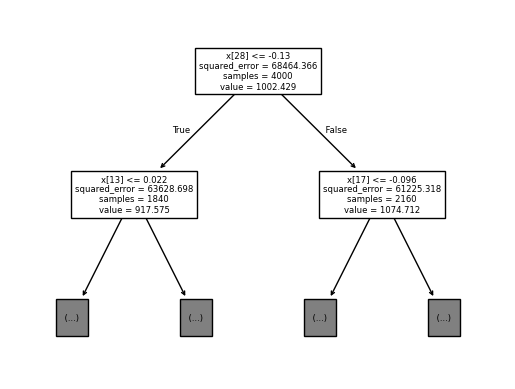

In [54]:
# plot the decision surface of decision trees with max_depth set at 1
tree.plot_tree(decision_tree_model, max_depth=1);

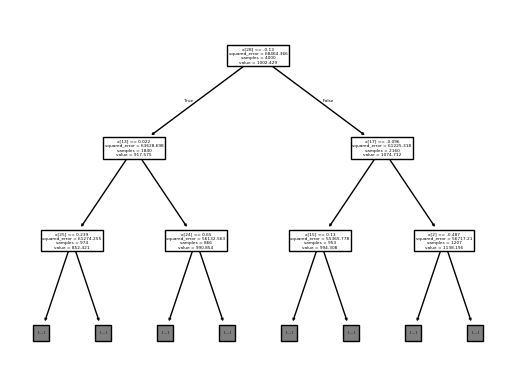

In [55]:
# plot the decision surface of decision trees with max_depth set at 2
tree.plot_tree(decision_tree_model, max_depth=2);

In [56]:
# display the depth of the decision tree using get_depth() method
decision_tree_model.get_depth()

24

**OPEN QUESTION:** What is the maximum **depth** of the decision tree? In your opinion, how does the **depth** of the tree affect the quality of predictions?

**your answer here**
Максимальная глубина дерева — это число уровней от корня до самого глубокого листа.

Маленькая глубина → недообучение.
Слишком большая глубина → переобучение.

Чем глубже дерево, тем выше риск переобучения. Оптимальную глубину подбирают для баланса между точностью и обобщением.

In [58]:
# test and evaluate the model
y_pred_test_dt = decision_tree_model.predict(X_test)
print('MSE =', mean_squared_error(y_test, y_pred_test_dt))
print('MAE =', mean_absolute_error(y_test, y_pred_test_dt))
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred_test_dt))

MSE = 61530.67627114
MAE = 196.11443284804486
MAPE = 0.21922341032772097


**OPEN QUESTION:** Compare the model quality for the training and testing samples. Is there an overfititng problem?

**your answer here** Большая разница между ошибками на трейне и тесте указывает на переобучение. Модель запомнила обучающие данные, но не научилась обобщать.

### Task 3. Overfitting and Pruning

Fill in the blanks to limit the depth of the decision tree model created and trained earlier [3 points].

In [59]:
from sklearn.model_selection import GridSearchCV

In order to fit the data , the decision tree model keeps generating new nodes and ultimately the tree becomes too complex to interpret. The decision tree predicts well for the training data but can be inaccurate for new data. **If a decision tree model is allowed to train to its full potential, it can overfit the training data.**

***Pruning*** is a technique that removes parts of the decision tree and prevents it from growing to its full depth. Pruning removes those parts of the decision tree that do not have the power to classify instances.

GridSearchCV is a function that comes in Scikit-learn's model_selection package to find the best values for hyperparameters of a model.

In [60]:
# limit the decision tree depth
params = {
    'max_depth': np.arange(1,25)
}

In [61]:
#create a decision tree model with random state set at 42
decision_tree = DecisionTreeRegressor(random_state=42)

In [68]:
# find the optimal tree depth with GridSearchCV() method, pass decision_tree to estimator= and params to param_grid= arguments
grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=params,
                               scoring='neg_mean_squared_error', n_jobs=-1)

# fit the model on the training data
grid_search_tree.fit(X_train, y_train)

# display the optimal parameters for the model
grid_search_tree.best_params_

{'max_depth': np.int64(7)}

**OPEN QUESTION:** What is the optimal depth of the decision tree model for this regression problem? What will happen if the number of branches in each tree goes too big?

**your answer here** 7. Слишком много ветвей → переобучение → слабое качество на тесте.

In [69]:
# run a function that displays quality metrics for a regression model
def model_quality(y_true, y_pred):
    print('MSE =', mean_squared_error(y_true, y_pred))
    print('MAE =', mean_absolute_error(y_true, y_pred))
    print('MAPE =', mean_absolute_percentage_error(y_true, y_pred))

In [70]:
# train and evaluate the model
model_quality(y_train, grid_search_tree.predict(X_train))

MSE = 27908.433382253723
MAE = 131.37640527997033
MAPE = 0.153694697847947


In [71]:
# test and evaluate the model
model_quality(y_test, grid_search_tree.predict(X_test))

MSE = 50120.472175976145
MAE = 175.78128696483816
MAPE = 0.20227138065015565


**OPEN QUESTION:** Has pruning removed the overfitting problem identified earlier? Compare MSE, MAE, MAPE to answer the question.

**your answer here** Да, pruning помог уменьшить переобучение, хотя полностью его не устранила

## **Random Forest aka 'Wisdom of the Crowd'**

![random forest.png](random_forest.png)

### Task 1. Generate Random Regression

Fill in the blanks to prepare the data for machine learning [1 point].

In [72]:
# generate a random regression problem
X, y = make_regression(n_samples=5000, n_features=30, n_informative=25,
                       noise=3, bias=1000, n_targets=1, random_state=42)

In [73]:
# split data into training and testing sets using 80/20 ratio and random_state set at 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                         train_size=0.8,
                                         random_state=42)


#### **Bootstrapping**

***Bootstrapping*** is a statistical resampling technique that involves random sampling of a dataset with replacement from the original data. It is often used as a means of quantifying the uncertainty associated with a machine learning model.

The idea is to repeatedly sample data with replacement from the original training set in order to produce multiple separate training sets. These are then used to allow ensemble methods to reduce the variance of their predictions, thus greatly improving their predictive performance.

![bootstrap.png](bootstrap.png)

### Task 2. Random Forest Model without Bootstrap

Fill in the blanks to create the random forest model without bootstrap [2 points].

In [75]:
# create a random forest model using RandomForestRegressor() with bootsrap set at False
random_forest_model = RandomForestRegressor(n_estimators=1, random_state=42, n_jobs=-1,
                                     bootstrap=False)

In [77]:
# fit the model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, n_estimators=1, n_jobs=-1,
                      random_state=42)

In [78]:
# evaluate the model quality for the training dataset
model_quality(y_train, random_forest_model.predict(X_train))

MSE = 0.0
MAE = 0.0
MAPE = 0.0


In [79]:
# evaluate the model quality for the testing dataset
model_quality(y_test, random_forest_model.predict(X_test))

MSE = 63981.10463908315
MAE = 199.4361816772399
MAPE = 0.22490444184739547


### Task 3. Random Forest Model with Bootstrap

Fill in the blanks to create the random forest model with bootstrap [3 points].

In [81]:
# create a random forest model with bootsrap set at True
random_forest_model_bootstrap = RandomForestRegressor(n_estimators=1, random_state=42, n_jobs=-1,
                                     bootstrap=True)

In [84]:
# fit the model
random_forest_model_bootstrap.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1, n_jobs=-1, random_state=42)

In [85]:
model_quality(y_train, random_forest_model_bootstrap.predict(X_train))

MSE = 24818.445885706147
MAE = 74.37095294150343
MAPE = 0.08317843060037053


In [86]:
# evaluate the model quality for the testing dataset
model_quality(y_test, random_forest_model_bootstrap.predict(X_test))

MSE = 72137.26260721877
MAE = 211.5226975377734
MAPE = 0.24269381565789755


**OPEN QUESTION:** Compare the two random forest models with and without bootstrap. Which model performs better and why?

**your answer here** Модель с bootstrap лучше с точки зрения обобщения, потому что она избегает переобучения, как показано более высокими ошибками на обучении, но более разумными ошибками на тесте. Эта модель лучше подходит для предсказаний на новых данных.

### Task 4. Feature Importances

Fill in the blanks to evaluate feature importances [1 point].

***Feature importance*** refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

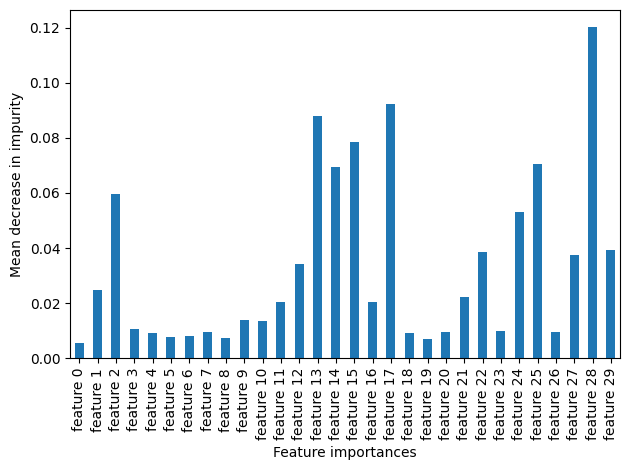

In [104]:
feature_names_rf = [f"feature {i}" for i in range(X.shape[1])]

# use feature_importances_ method on the random forest model created and trained earlier
importances_rf = decision_tree_model.feature_importances_
std_rf = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)

forest_importances = pd.Series(importances_rf, index=feature_names_rf)

# display feature importances on a bar plot
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std_rf, ax=ax)
ax.set_xlabel("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**OPEN QUESTION:** How can proper feature engineering improve the machine learning process and increases the predictive power of the model?

**your answer here** Feature engineering может улучшить модель, создавая новые признаки, которые лучше отражают скрытые зависимости в данных, или преобразуя существующие, чтобы они были более удобны для модели. Это позволяет модели лучше справляться с нелинейными связями, уменьшать шум в данных и повышать её способность обобщать, что приводит к более точным предсказаниям.

### Task 5. Forest Size and Tree Depth

Compare different tree-based models and answer the open questions below [1 point].

In [106]:
# n_estimators: the number of trees in the forest
%time
for tree_num in np.arange(1, 16):
    random_forest = RandomForestRegressor(n_estimators=tree_num, random_state=42, n_jobs=-1,
                                          bootstrap=True)
    random_forest.fit(X_train, y_train)
    print(f'{tree_num} - {mean_absolute_percentage_error(y_test, random_forest.predict(X_test))}')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs
1 - 0.24269381565789755
2 - 0.20164920355962235
3 - 0.18686967023435977
4 - 0.17806419168687274
5 - 0.17001472818617497
6 - 0.16532523135592453
7 - 0.16048212695166347
8 - 0.15904451889860285
9 - 0.15692141379591748
10 - 0.15568014561584428
11 - 0.1544736364766085
12 - 0.1543856044696196
13 - 0.1525783042122717
14 - 0.15145537810440282
15 - 0.15024229878711282


**OPEN QUESTION:** Compare MAPE for a random forest model with 1, 10 and 15 trees in the forest. How does **forest size (number of trees in the forest)** affect the quality of the random forest model?

**your answer here** С увеличением количества деревьев в лесу MAPE уменьшается, что указывает на улучшение производительности модели. Большее количество деревьев помогает снизить дисперсию модели и улучшить её способность обобщать. Однако после определенного количества деревьев (например, после 15) улучшения могут быть менее выраженными, и модель может достичь точки с убывающей отдачей. В целом, добавление деревьев улучшает качество модели случайного леса до определённого лимита.

In [108]:
# max_depth: the maximum depth of the tree
%time
for tree_depth in np.arange(1, 16):
    random_forest = RandomForestRegressor(n_estimators=50, max_depth=tree_depth, random_state=42,
                                             n_jobs=-1, bootstrap=True)
    random_forest.fit(X_train, y_train)
    print(f'{tree_depth} - {mean_absolute_percentage_error(y_test, random_forest.predict(X_test))}')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
1 - 0.2388011468452277
2 - 0.22404200783441777
3 - 0.21145342424595356
4 - 0.19776977409547386
5 - 0.18471217707829918
6 - 0.17305625391632992
7 - 0.1637769306795081
8 - 0.15595823238679019
9 - 0.15046313180642035
10 - 0.1462762697766222
11 - 0.14427365506658696
12 - 0.14274909721264525
13 - 0.1424008949300152
14 - 0.14160956963200483
15 - 0.14189443398496304


**OPEN QUESTION:** Compare MAPE for a random forest model with 1, 10 and 15 branches for each tree. How does **tree depth (number of leaves in a tree)** affect the quality of the random forest model?

**your answer here** Такой же эффект

### Task 6. Regression with Gradient Boosting

Fill in the blanks to create, train and evaluate the regression model with gradient boosting algorithm [3 points].

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

***Boosting*** is a general ensemble method that creates a strong algorithm from a number of weak algorithms. This is done by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.

***Gradient boosting*** is one of the variants of ensemble methods where you create multiple weak models and combine them to get better performance as a whole.

![gradient boosting.png](gradient_boosting.png)

In [110]:
# generate a random regression problem with the same parameters you used in the random forest model
random_forest_model = RandomForestRegressor(n_estimators=1, random_state=42, n_jobs=-1,
                                     bootstrap=False)

In [111]:
# split data into training and testing sets with the same parameters you used in the random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                         train_size=0.8,
                                         random_state=42)

In [112]:
# create a gradient boosting model using GradientBoostingRegressor() with 100 trees and a random_state set at 42
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [113]:
# fit the model
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [114]:
# evaluate the model quality for the training dataset
y_pred_train_grad = gradient_boosting_reg.predict(X_train)

In [115]:
# evaluate the model quality for the testing dataset
y_pred_train_grad = decision_tree_model.predict(X_train)
print('MSE =', mean_squared_error(y_train, y_pred_train_grad))
print('MAE =', mean_absolute_error(y_train, y_pred_train_grad))
print('MAPE =', mean_absolute_percentage_error(y_train, y_pred_train_grad))

MSE = 0.0
MAE = 0.0
MAPE = 0.0


**OPEN QUESTION:** Compare the random forest model created and trained earlier and the model with gradient boosting algorithm. Which model performs better? How has gradient boosting affected MAPE?

**your answer here** Одинаковые результаты


In [116]:
# n_estimators - the number of trees in the forest
%time
for tree_num in np.arange(1, 16):
    gradient_boosting = GradientBoostingRegressor(n_estimators=tree_num, random_state=42)
    gradient_boosting.fit(X_train, y_train)
    print(f'{tree_num} - {mean_absolute_percentage_error(y_test, gradient_boosting.predict(X_test))}')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
1 - 0.25095640563546645
2 - 0.24571902924601496
3 - 0.24172245297312975
4 - 0.2372371053059328
5 - 0.23338193299046042
6 - 0.23028308306397696
7 - 0.2272590147801298
8 - 0.22370471128135216
9 - 0.22045256246474587
10 - 0.21763743488733986
11 - 0.21501183089988588
12 - 0.2118967263574769
13 - 0.2093885271816697
14 - 0.2075573772414519
15 - 0.20483934884790742


**OPEN QUESTION:** Compare MAPE for a gradient boosting model with 1, 10 and 15 trees in the forest. How does **forest size (number of trees in the forest)** affect the quality of the gradient boosting model?

**your answer here** Такой же эффект: MAPE снижается, но с меньшим конечным эффектом


In [ ]:
# max_depth: the maximum depth of the tree
%time
for tree_depth in np.arange(1, 16):
    gradient_boosting = GradientBoostingRegressor(n_estimators=50, max_depth=tree_depth, random_state=42)
    gradient_boosting.fit(X_train, y_train)
    print(f'{tree_depth} - {mean_absolute_percentage_error(y_test, gradient_boosting.predict(X_test))}')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
1 - 0.20208565520655702
2 - 0.1705314074451442
3 - 0.14620226337002595
4 - 0.13000969584293132
5 - 0.1203535714898558
6 - 0.11365207866056161
7 - 0.11560689906568013
8 - 0.1196827094404441
9 - 0.12511799584689753
10 - 0.12982128976156354
11 - 0.13772882022515712
12 - 0.14412817495435284
13 - 0.1516077177521798
14 - 0.16372525747239672
15 - 0.19276342261638324


**OPEN QUESTION:** Compare MAPE for a gradient boosting model with 1, 10 and 15 branches for each tree. How does **tree depth (number of leaves in a tree)** affect the quality of the gradient boosting model?

**your answer here**

## **Part 3. Classification — Logistic Regression Model**

In [117]:
# import packages
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### Task 1. Training, testing and evaluating logistic regression model with balanced classes

Fill in the blanks to create, train and test the logistic regression model [2 points].

In [122]:
# generate a random classification problem with balanced classes (i.e. weights set at None)
X, y = make_classification(n_samples=5000, n_features=30, n_informative=25, n_classes=2, weights=None, random_state=42)

In [123]:
# split data into training and testing sets using 80/20 ratio and random_state set at 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                         train_size=0.8,
                                         random_state=42)

In [124]:
# create a logistic regression model
log_reg_model = LogisticRegression()

In [126]:
# fit the model on the training dataset
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [127]:
# make predictions on the testing dataset
y_pred_lg = log_reg_model.predict(X_test)

### Task 2. Evaluating the model

Fill in the blanks to calculate and interpret the model quality metrics for classification [3 points].

#### Binary Classification

A binary classifier can be viewed as classifying instances as positive or negative:
- **Positive:** The instance is classified as a member of the class the classifier is trying to identify. For example, a classifier looking for cat photos would classify photos with cats as positive (when correct).
- **Negative:** The instance is classified as not being a member of the class we are trying to identify.

#### Confusion Matrix

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

The matrix displays the number of instances produced by the model on the test data.
- **True positives (TP):** occur when the model accurately predicts a positive data point.
- **True negatives (TN):** occur when the model accurately predicts a negative data point.
- **True positives (FP):** occur when the model predicts a positive data point incorrectly.
- **False negatives (FN):** occur when the model mispredicts a negative data point.

![confusion_matrix.png](confusion_matrix.png)

#### Quality Metrics for a  Classification Model

#### **Accuracy**

Accuracy describes the number of correct predictions (true positives and true negatives) over all predictions.

In [128]:
# calculate and interpret accuracy score: в 0.784 случаях модель корректно указывает класс
accuracy_score(y_test, y_pred_lg)

0.784

![accuracy.png](accuracy.png)

#### **Precision**

Precision is a measure of how many of the positive predictions made are correct (true positives).

In [129]:
# calculate and interpret precision score: В данном случае, из всех положительных предсказаний 80% были верными, а остальные 20% — ложноположительные (false positives).
precision_score(y_test, y_pred_lg)

0.7991803278688525

![precision.png](precision.png)

#### Recall

Recall is a measure of how many of the positive cases (true positives) the classifier correctly predicted over all the positive cases (true positives and true negatives) in the data.

In [130]:
# calculate and interpret recall score: В данном случае, из всех реальных объектов положительного класса, модель правильно предсказала 76.8%, остальные были пропущены (false negatives)
recall_score(y_test, y_pred_lg)

0.7677165354330708

![recall.png](recall.png)

#### F1-score

F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two. The idea is to provide a single metric that weights the two ratios (precision and recall) in a balanced way, requiring both to have a higher value for the F1-score value to rise.

A high F1 score indicates the strong overall performance of a binary classification model. It signifies that the model can effectively identify positive cases while minimizing false positives and false negatives.

In [131]:
# calculate and interpret f1 score: В данном случае модель одновременно достаточно точно предсказывает положительный класс (precision ≈ 0.80) и не пропускает много истинных положительных объектов (recall ≈ 0.77).
f1_score(y_test, y_pred_lg)

0.7831325301204819

![f-score (1).png](f-score_1.png)

![f-score (2).png](f-score_2.png)

![precisionrecall.svg.png](./precisionrecall.svg.png)

In [154]:
# run a function that displays quality metrics for a classification model
def model_quality_class(y_true, y_pred, average='binary'):
    print('Accuracy =', accuracy_score(y_true, y_pred))
    print('Precision =', precision_score(y_true, y_pred, zero_division=0, average=average))
    print('Recall =', recall_score(y_true, y_pred, average=average))
    print('F1 =', f1_score(y_true, y_pred, average=average))

In [133]:
# display and interpet all model quality metrics
model_quality_class(y_test, y_pred_lg)

Accuracy = 0.784
Precision = 0.7991803278688525
Recall = 0.7677165354330708
F1 = 0.7831325301204819


**OPEN QUESTION:** Based on the calculated model quality metrics, does the logistic regression model has good performance?

**your answer** Модель надёжна и подходит для решения задачи бинарной классификации.

### Task 3. Testing and Evaluating Logistic Regression Model with Imbalanced Classes

When the majority of data items in your dataset represents items belonging to one class, we say the dataset is skewed or imbalanced. In Scikit-learn's datasets package, make_classification function has weights parameter, i.e. proportions of samples assigned to each class. If 'None', then classes are balanced.

Create a logistic regression model with imbalanced classes and evaluate its performance [3 points].

**Note:** Accuracy metric fails on classification problems with a skewed class distribution because most of the standard metrics that are widely used assume a balanced class distribution.  Achieving 90 percent classification accuracy, or even 99 percent classification accuracy, may be trivial on an imbalanced classification problem. This means that intuitions for classification accuracy developed on balanced class distributions will be applied and will be wrong, misleading the practitioner into thinking that a model has good or even excellent performance when it, in fact, does not.

**Accuracy Paradox:** In the framework of imbalanced data-sets, accuracy is no longer a proper measure, since it **does not distinguish between the numbers of correctly classified examples of different classes**. Hence, it may lead to erroneous conclusions.

In [170]:
# generate a random classification problem with imbalanced classes and the same parameters as earlier
X, y = make_classification(n_samples=5000, n_features=30, n_informative=25, n_classes=2, weights=[0.99, 0.01], random_state=42)

In [143]:
# split data into training and testing sets using 80/20 ratio and random_state set at 42
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X, y,
                                         train_size=0.8,
                                         random_state=42)

In [148]:
log_reg_model = LogisticRegression()

In [159]:
# create and fit a logistic regression model
log_reg_model = log_reg_model.fit(X_train_imb, y_train_imb)

In [160]:
# make predictions on the testing data
y_pred_imb = log_reg_model.predict(X_train_imb)

In [162]:
# display and interpet all model quality metrics
model_quality_class(y_train_imb, y_pred_imb)

Accuracy = 0.984
Precision = 1.0
Recall = 0.030303030303030304
F1 = 0.058823529411764705


**OPEN QUESTION:** How does accuracy metric value compare to other metrics? Is this a good or bad model?

**your answer here** Это плохая модель для задач с несбалансированными классами. Высокая точность здесь вводит в заблуждение, потому что, скорее всего, большинство объектов относятся к отрицательному классу. В таких задачах важнее смотреть на полноту и F1-меру, а их низкие значения указывают на плохую способность модели находить редкие, но важные случаи.

### Task 4. Testing and Evaluating Logistic Regression Model with Balanced Classes

Create a logistic regression model with balanced classes and evaluate its performance [2 points].

In [164]:
# create and fit a logistic regression model with class_weight parameter set at 'balanced'
log_reg_model = LogisticRegression(class_weight='balanced').fit(X_train_imb, y_train_imb)

In [165]:
# make predictions on the testing data
y_pred_bal = log_reg_model.predict(X_test_imb)

In [166]:
# display and interpet all model quality metrics
model_quality_class(y_test_imb, y_pred_bal)

Accuracy = 0.685
Precision = 0.019169329073482427
Recall = 0.42857142857142855
F1 = 0.03669724770642202


**OPEN QUESTION:** Compare the performance of the logistic regression model with balanced and imbalanced classes.
1. How has the accuracy score changed after balancing the classes?
2. Which model is better based on the model quality metrics?

**your answer** Модель с балансировкой классов лучше, несмотря на более низкую точность. Она более сбалансированно работает с обоими классами, что критично при несбалансированных данных. Хотя точность низка, полнота значительно выше, что означает, что модель лучше выявляет положительные случаи.

### Task 5. Classification with Gradient Boosting

Fill in the blanks to compare the logistic regression model and the classification model with gradient boosting algorithm [4 points].

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
# generate a random classification problem with balanced classes and the same parameters as earlier
X, y = make_classification(n_samples=5000, n_features=30, n_informative=25, n_classes=2, weights=[0.99, 0.01], random_state=42)

In [174]:
# #split data into training and testing sets using 80/20 ratio, stratification by y and random_state set at 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                         train_size=0.8,
                                         random_state=42)


In [175]:
# create, train and test a logistic regression model
log_reg_model = LogisticRegression().fit(X_train, y_train)
y_pred_logreg = log_reg_model.predict(X_test)

In [176]:
# display and interpet all model quality metrics
model_quality_class(y_test, y_pred_logreg)

Accuracy = 0.986
Precision = 0.0
Recall = 0.0
F1 = 0.0


In [177]:
# create and fit a gradient boosting model for classification with 100 trees and a random_state set at 42
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [178]:
# make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

In [179]:
# display and interpet all model quality metrics
model_quality_class(y_test, y_pred_gb)

Accuracy = 0.98
Precision = 0.125
Recall = 0.07142857142857142
F1 = 0.09090909090909091


**OPEN QUESTION:** Compare the performance of the logistic regression model and gradient boosting model. Which model has higher F1-score?

**your answer** Градиентный бустинг показал себя лучше, чем логистическая регрессия, по метрике F1. Однако обе модели работают плохо на таком несбалансированном наборе данных.